<a href="https://colab.research.google.com/github/mb7015/1st-repo/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls /content/drive/MyDrive/FYPDataset/creditcard_2023.csv

Mounted at /content/drive/
/content/drive/MyDrive/FYPDataset/creditcard_2023.csv


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib



In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/FYPDataset/creditcard_2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.fillna(df.mean(), inplace=True) #Fill in missing values inputation using average and inplace

In [ ]:
X= df.drop(['id', 'Class'], axis=1, errors='ignore')
y= df['Class']

In [ ]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:

# =====================
# 🔹 STEP 4: Train-Test Split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# =====================
# 🔹 STEP 5: Handle Class Imbalance with SMOTE
# =====================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [ ]:
X_train.shape

(454904, 29)

In [ ]:
X_test.shape

(113726, 29)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)       #Normalize right feature roes make estimate effective

In [ ]:
print(pd.Series(y_train).value_counts(normalize=True))


Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
    )   #Just to specify min no of descision trees it exibits to prevent over heat random samples we choos is 5

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize classifier
clf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=None,     # let trees grow fully
    random_state=42,
    n_jobs=-1           # parallelize tree building
)

# Perform 5-fold cross-validation with F1 scoring
cv_scores = cross_val_score(
    clf,
    X_train_res,
    y_train_res,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

print("\nCross-validation F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))



Cross-validation F1 scores: [0.99985713 0.9998901  0.99980219 0.9998901  0.99985713]
Average F1 score: 0.9998593310461825


In [ ]:
rf_model.fit(X_train_scaled, y_train) #Hence final model is trained on all data to maximize training(potential)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
y_pred=rf_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56863
           1       1.00      0.97      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [ ]:
# =====================
# 🔹 STEP 6: Train Model
# =====================
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# =====================
# 🔹 STEP 7: Evaluation
# =====================
y_pred = clf.predict(X_test_scaled)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ROC-AUC: 0.9999897675845453


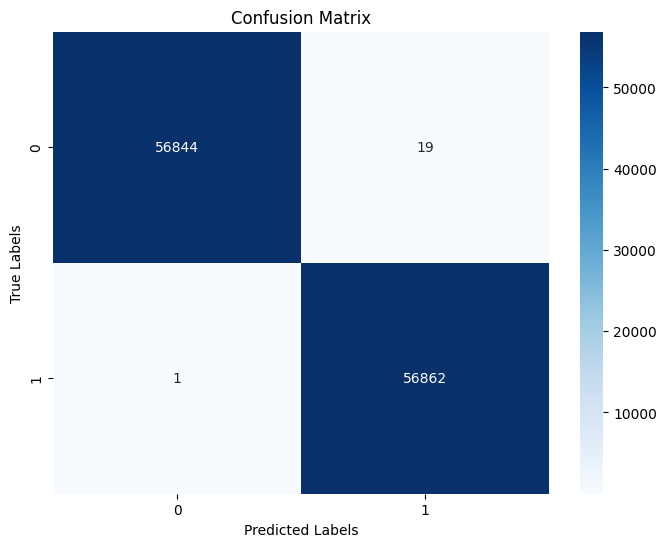

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from sklearn.pipeline import Pipeline

def get_feature_importances(clf, X, y=None, n_repeats=10, random_state=42):
    """
    Returns a DataFrame with features and importances sorted descending.

    Parameters
    ----------
    clf : estimator or Pipeline
        Fitted classifier (or pipeline). If a Pipeline is provided, the final
        estimator is used for attribute-based importances.
    X : pd.DataFrame or np.ndarray
        Feature data used to determine feature names and/or for permutation importance.
    y : array-like, optional
        Target values. Required only if the estimator doesn't expose feature_importances_ or coef_.
    n_repeats : int
        Number of repeats for permutation_importance (fallback).
    random_state : int
        Random seed for permutation importance.
    """
    # --- feature names
    if hasattr(X, "columns"):
        feature_names = list(X.columns)
    else:
        feature_names = [f"feature_{i}" for i in range(X.shape[1])]

    # --- ensure estimator is fitted
    try:
        check_is_fitted(clf)
    except (NotFittedError, AttributeError):
        raise ValueError("Estimator is not fitted. Fit `clf` before extracting feature importances.")

    # --- if pipeline, use final estimator for attribute checks
    estimator = clf
    if isinstance(clf, Pipeline):
        estimator = clf.steps[-1][1]

    # --- try tree-based importances
    if hasattr(estimator, "feature_importances_"):
        importances = estimator.feature_importances_

    # --- try linear model coefficients
    elif hasattr(estimator, "coef_"):
        coef = estimator.coef_
        # if multiclass, average absolute coefs across classes
        if coef.ndim == 1:
            importances = np.abs(coef)
        else:
            importances = np.mean(np.abs(coef), axis=0)

    # --- fallback: permutation importance (requires y)
    else:
        if y is None:
            raise ValueError(
                "Estimator does not expose `feature_importances_` or `coef_`. "
                "Pass `y` to compute permutation_importance as a fallback."
            )
        result = permutation_importance(
            clf, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=-1
        )
        importances = result.importances_mean

    # --- sanity check: lengths must match
    if len(importances) != len(feature_names):
        raise ValueError(
            f"Number of importances ({len(importances)}) does not match number of feature names ({len(feature_names)}). "
            "This can happen if your pipeline transforms or reduces features."
        )

    # --- build and return DataFrame
    feature_imp = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values("Importance", ascending=False).reset_index(drop=True)

    return feature_imp

    ####print(feature_imp)


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/FYPDataset/creditcard_2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.fillna(df.mean(), inplace=True) #Fill in missing values inputation using average and inplace

In [ ]:
X= df.drop(['id', 'Class'], axis=1, errors='ignore')
y= df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


# =====================
# 🔹 STEP 4: Train-Test Split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# =====================
# 🔹 STEP 5: Handle Class Imbalance with SMOTE
# =====================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)       #Normalize right feature roes make estimate effective

In [ ]:
# =====================
# 🔹 STEP 6: Train Model
# =====================
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# =====================
# 🔹 STEP 7: Evaluation
# =====================
y_pred = clf.predict(X_test_scaled)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ROC-AUC: 0.9999897675845453


In [ ]:
feature_imp = get_feature_importances(clf, X_train_res, y_train_res)
print(feature_imp)

   Feature  Importance
0      V10    0.156471
1      V14    0.152410
2       V4    0.141192
3      V12    0.108731
4      V11    0.087315
5      V17    0.059593
6      V16    0.051533
7       V7    0.043577
8       V3    0.034272
9       V2    0.020122
10     V21    0.015917
11      V9    0.012692
12      V8    0.011856
13     V18    0.010600
14      V1    0.009535
15      V5    0.009339
16      V6    0.008860
17     V28    0.007552
18     V19    0.007450
19     V27    0.007230
20     V13    0.006730
21     V20    0.005868
22     V25    0.005667
23     V26    0.005584
24     V23    0.005442
25     V15    0.005428
26     V24    0.004769
27     V22    0.004203
28  Amount    0.000063


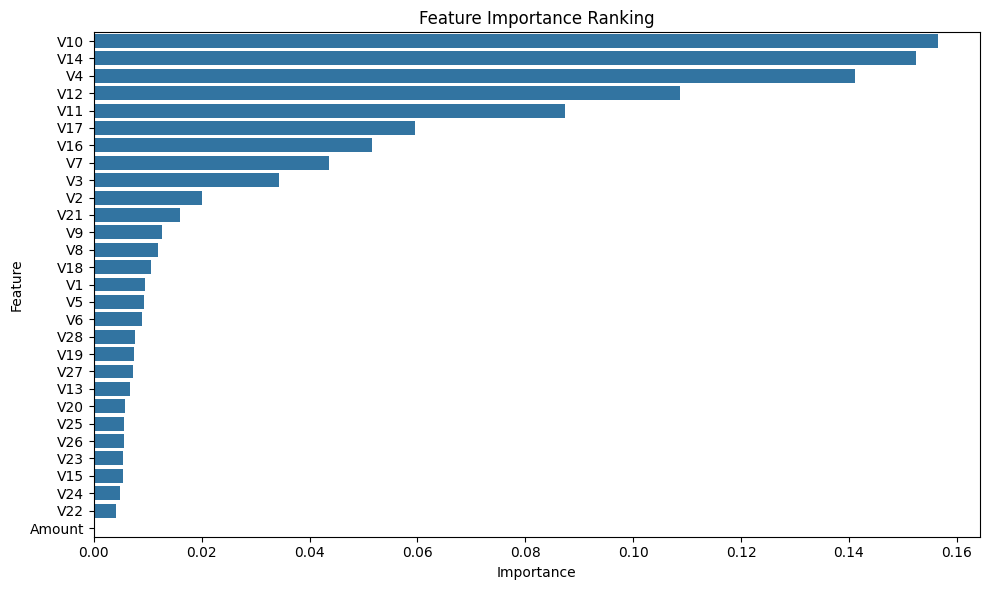

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importance Ranking')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

,count
Class,
0,284315
1,284315


In [ ]:
legit = df[df['Class']==0]
fraud = df[df['Class']==1]

In [ ]:
fraud['Class']

,Class
541,1
623,1
4920,1
6108,1
6329,1
...,...
568625,1
568626,1
568627,1
568628,1


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,12026.313506
std,6929.500715
min,50.120000
25%,6034.540000
50%,11996.900000
75%,18040.265000
max,24039.930000


In [ ]:
fraud.Amount.describe()

,Amount
count,284315.000000
mean,12057.601763
std,6909.750891
min,50.010000
25%,6074.640000
50%,12062.450000
75%,18033.780000
max,24039.930000


In [ ]:
# compare the values for both transactions
df.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [ ]:
#Build a sample dataset containing similar distribution
legit_sample = legit.sample(n=25)

In [ ]:
#concacinate ledit sample with fraud on asix
new_df = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
#new values
new_df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217854,217854,-0.506724,-0.286071,1.822737,-2.551748,-0.020345,0.276356,-0.303445,-1.116971,1.690966,...,-1.139269,1.303912,-1.303367,0.939209,0.090326,-0.690025,0.296975,0.313946,19075.91,0
244870,244870,1.701245,-0.610981,0.354111,-0.413608,-0.011867,0.221036,0.229582,-0.151246,1.372522,...,-0.018488,0.714225,0.193364,2.724565,-0.503890,1.172658,-0.271684,-0.191319,9661.33,0
86106,86106,0.960161,-0.504749,0.783604,-0.559721,-0.024479,-0.105673,0.394787,-0.192665,0.685147,...,-0.141720,-0.398616,0.020631,0.956375,0.084259,1.747204,-0.326679,-0.049365,15378.22,0
43512,43512,-0.206982,-0.141209,1.255083,-0.163884,0.513570,0.118293,0.627140,-0.144672,0.255569,...,-0.288168,-0.985776,-0.166909,0.057216,0.306416,-1.215642,0.145146,0.159059,14395.86,0
246497,246497,-1.361096,-5.033484,-0.729163,-0.761560,0.033662,-1.749846,0.500671,-0.001037,0.726892,...,-0.206459,0.207388,0.813305,0.447371,-2.256151,-2.699949,1.132062,-6.681975,16008.47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [ ]:
new_df['Class'].value_counts()

,count
Class,
1,284315
0,25


In [ ]:
new_df.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,139524.840000,0.452760,-0.715561,0.675317,-0.784741,0.361924,0.052384,0.468475,-0.202510,0.435283,...,-0.294873,-0.137503,0.133791,-0.122952,0.347144,0.264928,-0.260520,-0.064434,-0.171107,14455.736000
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.109640,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [ ]:
#defining their original axis
X = df.drop(columns='Class', axis=1)
Y = df['Class']

In [ ]:
#defining their latest axis
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# training the Logistic Regression Model with Training Data
model = LogisticRegression()
model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data (LR) : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data (LR) : ', test_data_accuracy)

Accuracy on Training data (LR) :  0.9998593233452908
Accuracy score on Test Data (LR) :  0.9998769079271295


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_lr = accuracy_score(Y_train, X_train_prediction)
precision_lr = precision_score(Y_train, X_train_prediction)
recall_lr = recall_score(Y_train, X_train_prediction)
f1_lr = f1_score(Y_train, X_train_prediction)

print("Accuracy (LR):", accuracy_lr)
print("Precision (LR):", precision_lr)
print("Recall (LR):", recall_lr)
print("F1 Score (LR):", f1_lr)

Accuracy (LR): 0.9998593233452908
Precision (LR): 0.9999252596129328
Recall (LR): 0.9999340520197668
F1 Score (LR): 0.9999296557970218


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for test predictions
report = classification_report(Y_test, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       1.00      1.00      1.00     56863

    accuracy                           1.00     56868
   macro avg       0.62      0.60      0.61     56868
weighted avg       1.00      1.00      1.00     56868



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction_rf = rf_model.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)
print('Accuracy on Training data (Random Forest):', training_data_accuracy_rf)

# Accuracy on test data
X_test_prediction_rf = rf_model.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)
print('Accuracy score on Test Data (Random Forest):', test_data_accuracy_rf)

Accuracy on Training data (Random Forest): 1.0
Accuracy score on Test Data (Random Forest): 0.9999120770908068


In [ ]:
from xgboost import XGBClassifier

# Create and train the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction_xgb = xgb_model.predict(X_train)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, Y_train)
print('Accuracy on Training data (XGBoost):', training_data_accuracy_xgb)

# Accuracy on test data
X_test_prediction_xgb = xgb_model.predict(X_test)
test_data_accuracy_xgb = accuracy_score(X_test_prediction_xgb, Y_test)
print('Accuracy score on Test Data (XGBoost):', test_data_accuracy_xgb)

Accuracy on Training data (XGBoost): 1.0
Accuracy score on Test Data (XGBoost): 0.9999120770908068


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_xgb = accuracy_score(Y_train, X_train_prediction_xgb)
precision_xgb = precision_score(Y_train, X_train_prediction_xgb)
recall_xgb = recall_score(Y_train, X_train_prediction_xgb)
f1_xgb = f1_score(Y_train, X_train_prediction_xgb)

print("Accuracy (XGBoost):", accuracy_xgb)
print("Precision (XGBoost):", precision_xgb)
print("Recall (XGBoost):", recall_xgb)
print("F1 Score (XGBoost):", f1_xgb)

Accuracy (XGBoost): 1.0
Precision (XGBoost): 1.0
Recall (XGBoost): 1.0
F1 Score (XGBoost): 1.0


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for test predictions
report = classification_report(Y_test, X_test_prediction_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00     56863

    accuracy                           1.00     56868
   macro avg       0.50      0.50      0.50     56868
weighted avg       1.00      1.00      1.00     56868



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # Using MSE as a metric for regression

# Create and train the Linear Regression model
# Note: Linear Regression is not suitable for binary classification problems.
# The output will be continuous values, not class labels (0 or 1).
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_lr = lr_model.predict(X_test)

# You can evaluate the model using regression metrics like Mean Squared Error
print('Mean Squared Error (Linear Regression):', mean_squared_error(Y_test, Y_pred_lr))

# To interpret this for classification, you would typically threshold the predictions
# For example, classify as 1 if prediction > 0.5, and 0 otherwise.
from sklearn.metrics import accuracy_score
Y_pred_lr_classified = (Y_pred_lr > 0.5).astype(int)
print('Accuracy (Linear Regression with Threshold):', accuracy_score(Y_test, Y_pred_lr_classified))

Mean Squared Error (Linear Regression): 8.77789353065824e-05
Accuracy (Linear Regression with Threshold): 0.9999120770908068


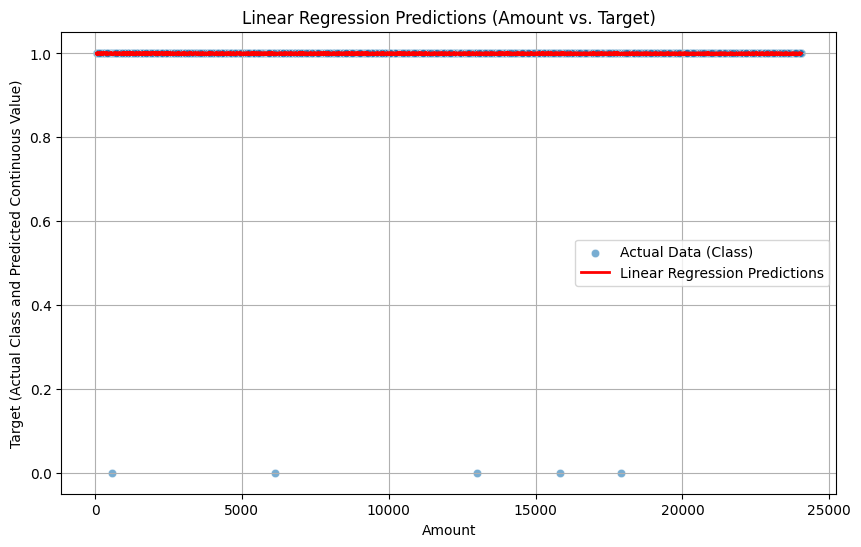

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Choose a feature to plot against the target
# For simplicity, let's use the 'Amount' feature
X_plot_feature = X_test['Amount']
y_plot_actual = Y_test

# Predict using the trained Linear Regression model on the full test data
y_pred_full = lr_model.predict(X_test)

# Now, let's plot the 'Amount' feature against the actual and predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points (Amount vs. Class)
sns.scatterplot(x=X_plot_feature, y=y_plot_actual, alpha=0.6, label='Actual Data (Class)')

# Scatter plot of predicted values (Amount vs. Predicted Continuous Value)
# We'll sort by Amount to get a smoother line-like representation of the prediction
sorted_indices = np.argsort(X_plot_feature)
plt.plot(X_plot_feature.iloc[sorted_indices], y_pred_full[sorted_indices], color='red', linewidth=2, label='Linear Regression Predictions')


plt.title('Linear Regression Predictions (Amount vs. Target)')
plt.xlabel('Amount')
plt.ylabel('Target (Actual Class and Predicted Continuous Value)')
plt.legend()
plt.grid(True)
plt.show()